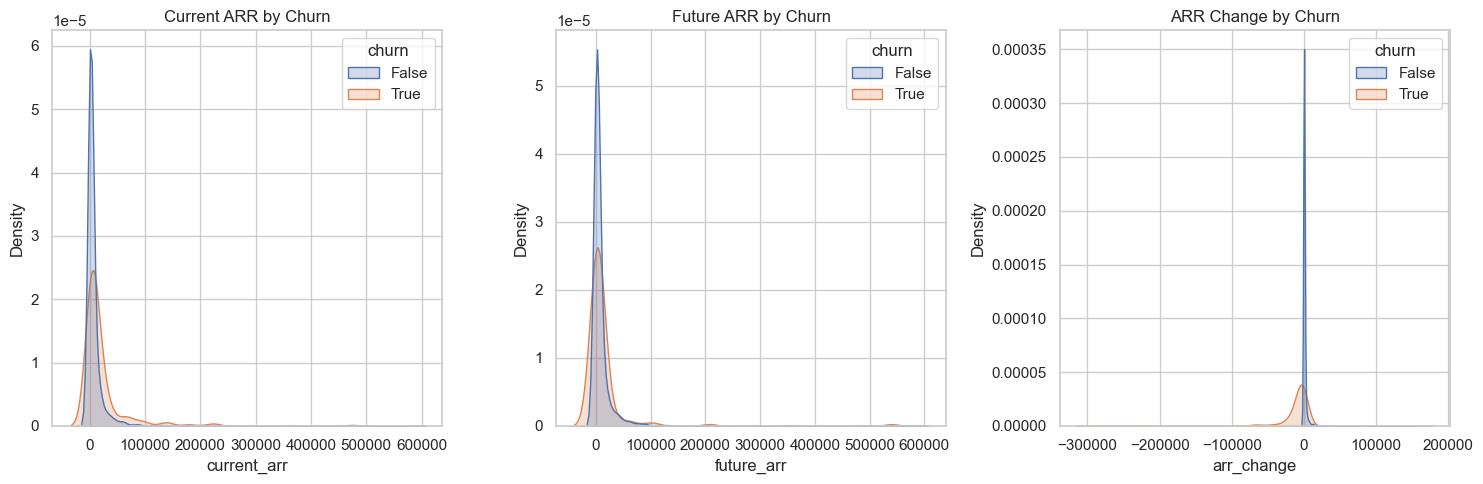

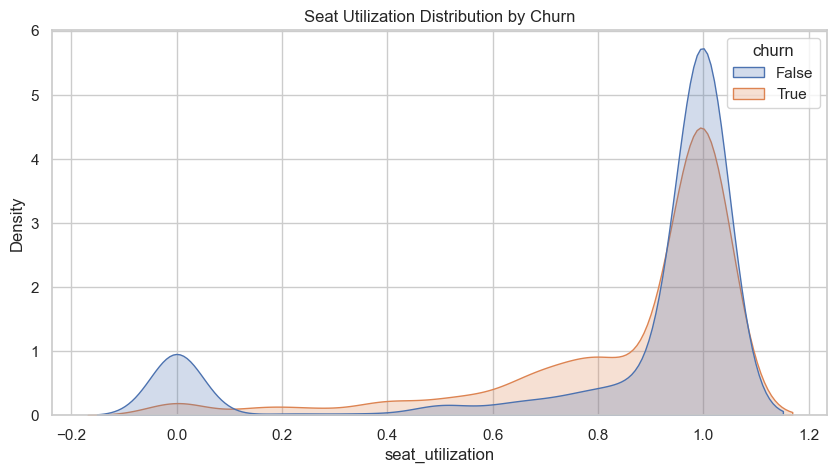

C:\Users\sathe\AppData\Local\Temp\ipykernel_21860\2766171299.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='csat_score', data=data, ci=None)


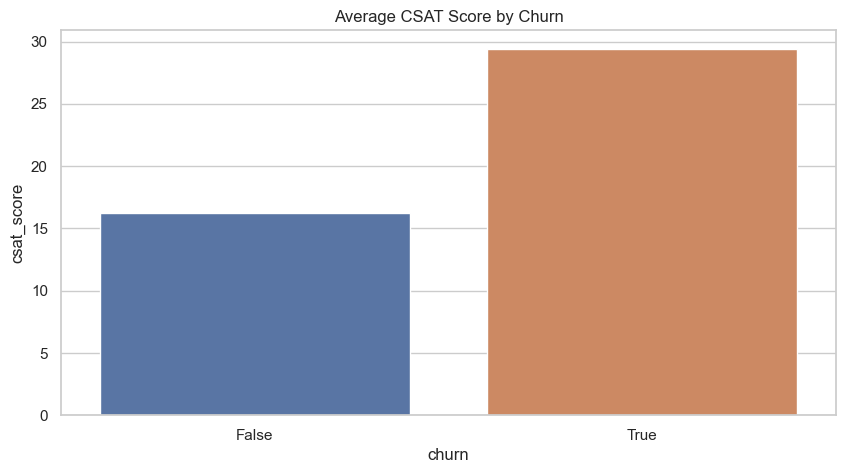

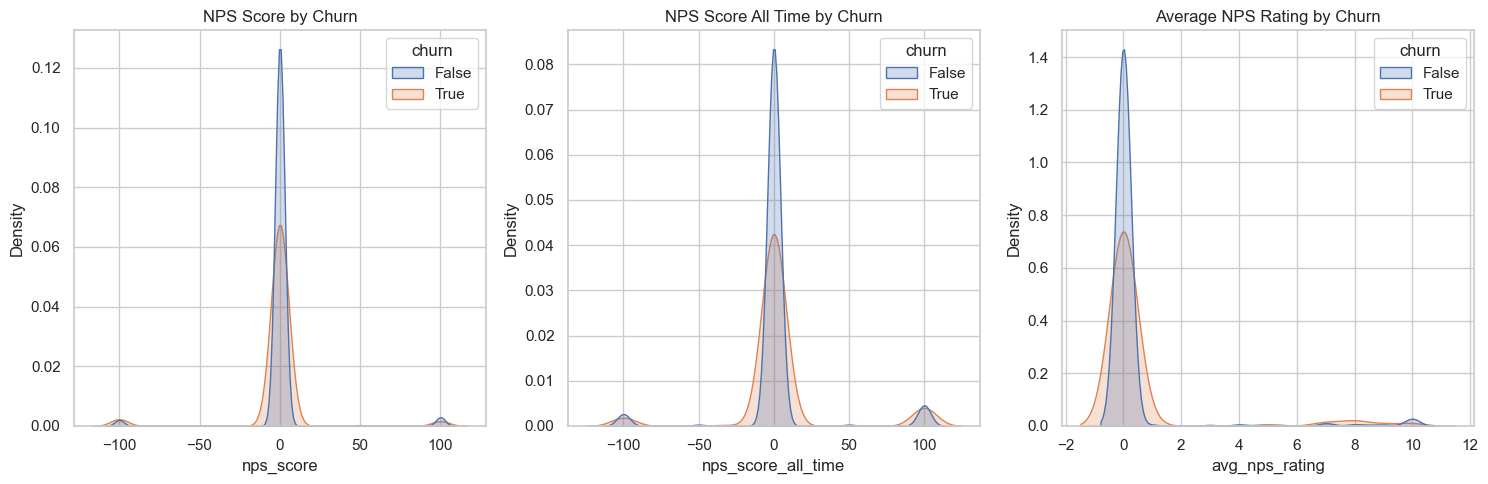

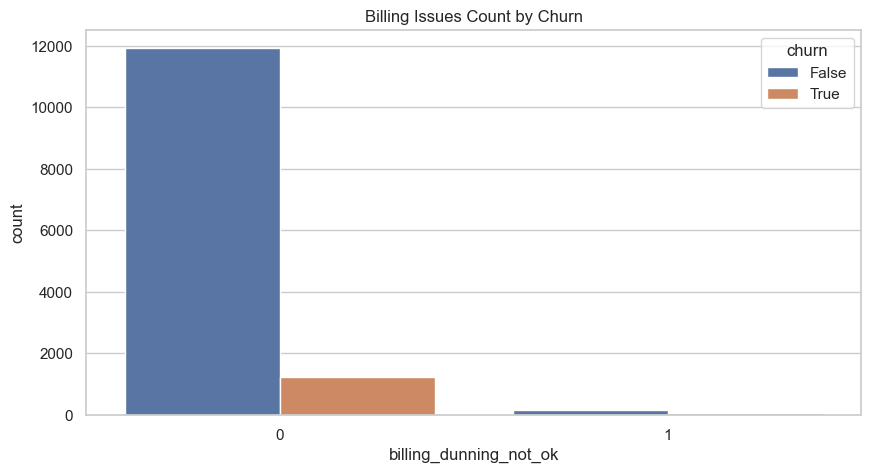

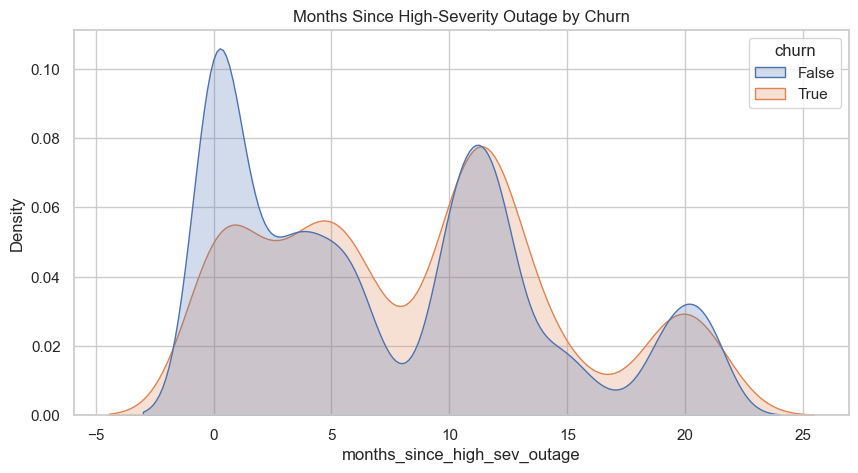

C:\Users\sathe\AppData\Local\Temp\ipykernel_21860\2766171299.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='product_counts', data=data, ci=None)


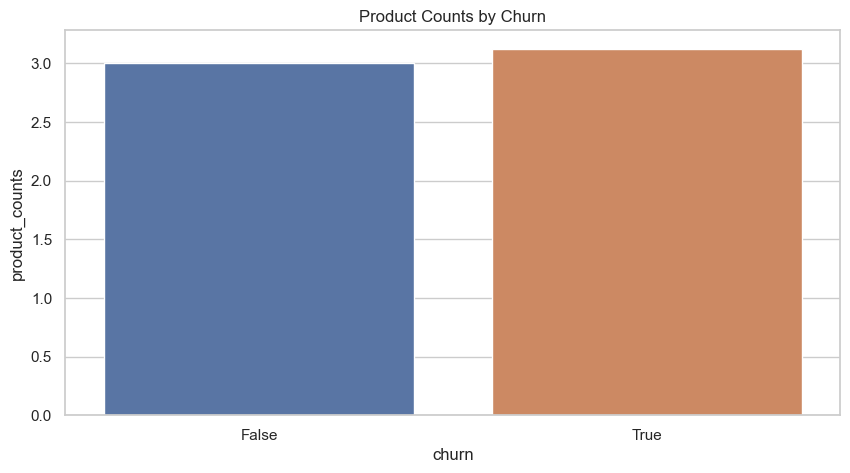

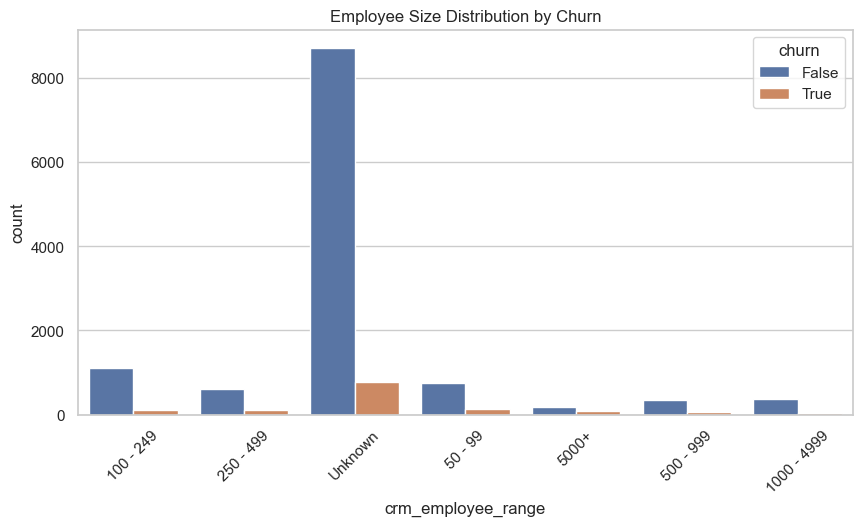

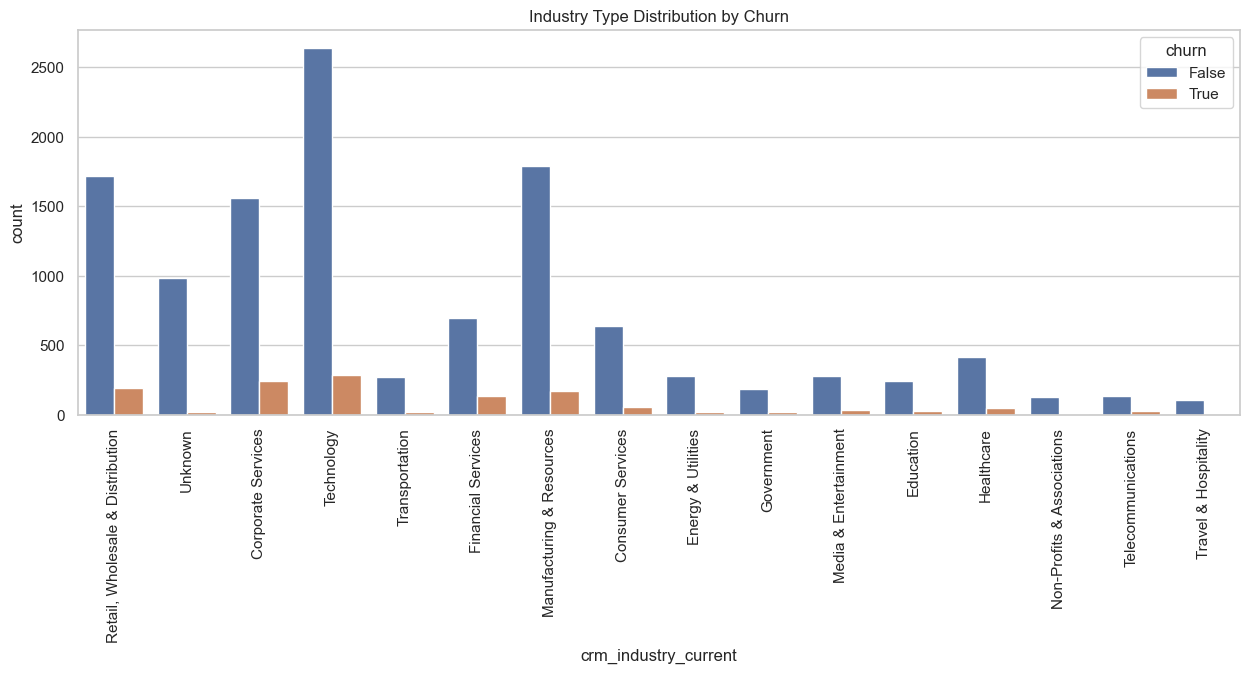

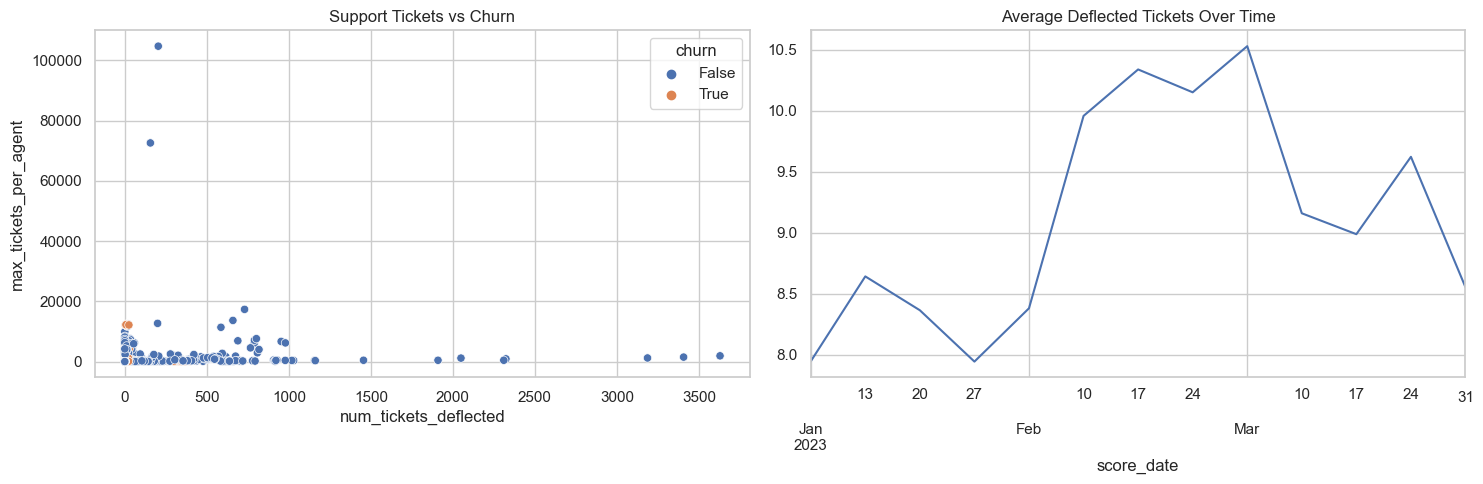

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Define churn column (assuming 'churn' column represents churn status: 1 = churned, 0 = not churned)
# Replace this logic with the actual churn column name or index if needed
data['churn'] = data["arr_change"]<-428  # Adjust based on the actual churn column index or name

# Convert 'score_date' to datetime for proper grouping
data['score_date'] = pd.to_datetime(data['score_date'])

# Set style for seaborn
sns.set(style="whitegrid")

# 1. ARR Change Impacts Churn
plt.figure(figsize=(15, 5))

# Density plot for ARR-related features
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='current_arr', hue='churn', fill=True, common_norm=False)
plt.title('Current ARR by Churn')

plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='future_arr', hue='churn', fill=True, common_norm=False)
plt.title('Future ARR by Churn')

plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='arr_change', hue='churn', fill=True, common_norm=False)
plt.title('ARR Change by Churn')

plt.tight_layout()
plt.show()

# 2. Low Seat Utilization Increases Churn
plt.figure(figsize=(10, 5))

# Density plot for seat utilization
sns.kdeplot(data=data, x='seat_utilization', hue='churn', fill=True, common_norm=False)
plt.title('Seat Utilization Distribution by Churn')

plt.show()

# 3. Low CSAT Leads to Higher Churn
plt.figure(figsize=(10, 5))

# Bar chart for average CSAT score
sns.barplot(x='churn', y='csat_score', data=data, ci=None)
plt.title('Average CSAT Score by Churn')

plt.show()

# 4. Low NPS May Lead to Churn
plt.figure(figsize=(15, 5))

# Density plot for NPS-related features
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='nps_score', hue='churn', fill=True, common_norm=False)
plt.title('NPS Score by Churn')

plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='nps_score_all_time', hue='churn', fill=True, common_norm=False)
plt.title('NPS Score All Time by Churn')

plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='avg_nps_rating', hue='churn', fill=True, common_norm=False)
plt.title('Average NPS Rating by Churn')

plt.tight_layout()
plt.show()

# 5. More Billing Issues Increase Churn
plt.figure(figsize=(10, 5))

# Count plot for billing issues
sns.countplot(x='billing_dunning_not_ok', hue='churn', data=data)
plt.title('Billing Issues Count by Churn')

plt.show()

# 6. More High-Severity Outages Lead to Churn
plt.figure(figsize=(10, 5))

# Density plot for months since high-severity outage
sns.kdeplot(data=data, x='months_since_high_sev_outage', hue='churn', fill=True, common_norm=False)
plt.title('Months Since High-Severity Outage by Churn')

plt.show()

# 7. Fewer Product Count Leads to Churn
plt.figure(figsize=(10, 5))

# Bar chart for product counts
sns.barplot(x='churn', y='product_counts', data=data, ci=None)
plt.title('Product Counts by Churn')

plt.show()

# 8. Smaller Employee Size Leads to Churn
plt.figure(figsize=(10, 5))

# Bar chart for employee range (categorical variable)
sns.countplot(x='crm_employee_range', hue='churn', data=data)
plt.title('Employee Size Distribution by Churn')
plt.xticks(rotation=45)

plt.show()

# 9. Industry Type Impacts Churn
plt.figure(figsize=(15, 5))

# Count plot for industry type
sns.countplot(x='crm_industry_current', hue='churn', data=data)
plt.title('Industry Type Distribution by Churn')
plt.xticks(rotation=90)

plt.show()

# 10. More Support Tickets Indicate Future Churn
plt.figure(figsize=(15, 5))

# Scatter plot for support tickets
plt.subplot(1, 2, 1)
sns.scatterplot(x='num_tickets_deflected', y='max_tickets_per_agent', hue='churn', data=data)
plt.title('Support Tickets vs Churn')

# Line chart for ticket trends over time
plt.subplot(1, 2, 2)
data.groupby('score_date')['num_tickets_deflected'].mean().plot()
plt.title('Average Deflected Tickets Over Time')

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [32]:
customer_feedback = pd.read_csv("cleaned/customer_feedback_cleaned.csv")
customer = pd.read_csv("cleaned/customer_cleaned.csv")
expansion_outcome = pd.read_csv("cleaned/expansion_outcome_cleaned.csv")
product = pd.read_csv("cleaned/product_cleaned.csv")
utilization = pd.read_csv("cleaned/utilization_cleaned.csv")

In [33]:
merged_data = (
    customer
    .merge(customer_feedback, on=["id", "score_date"], how="left")
    .merge(expansion_outcome, on=["id", "score_date"], how="left")
    .merge(product, on=["id", "score_date"], how="left")
    .merge(utilization, on=["id", "score_date"], how="left")
)

In [34]:
merged_data.to_csv("merged_data.csv", index=False)

In [35]:
df= pd.read_csv("merged_data.csv")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13389 non-null  object 
 1   score_date                           13389 non-null  object 
 2   segment_smb                          13389 non-null  int64  
 3   segment_non_smb                      13389 non-null  int64  
 4   segment_commercial                   13389 non-null  int64  
 5   segment_enterprise                   13389 non-null  int64  
 6   segment_midmarket                    13389 non-null  int64  
 7   region_emea                          13389 non-null  int64  
 8   region_apac                          13389 non-null  int64  
 9   region_latam                         13389 non-null  int64  
 10  region_amer                          13389 non-null  int64  
 11  customer_age_quarters       

In [37]:
print(df.head(10))

              id  score_date  segment_smb  segment_non_smb  \
0   JMAN_2429072  2023-02-10            1                0   
1   JMAN_9043466  2023-01-13            0                1   
2   JMAN_2452556  2023-02-24            0                1   
3   JMAN_2455113  2023-03-03            0                1   
4  JMAN_18127937  2023-02-10            0                1   
5   JMAN_2373631  2023-03-03            0                1   
6   JMAN_2447279  2023-03-03            1                0   
7   JMAN_9004478  2023-01-20            1                0   
8   JMAN_2477864  2023-03-24            1                0   
9   JMAN_2445629  2023-01-20            0                1   

   segment_commercial  segment_enterprise  segment_midmarket  region_emea  \
0                   0                   0                  0            1   
1                   1                   0                  0            1   
2                   0                   0                  0            1   
3        

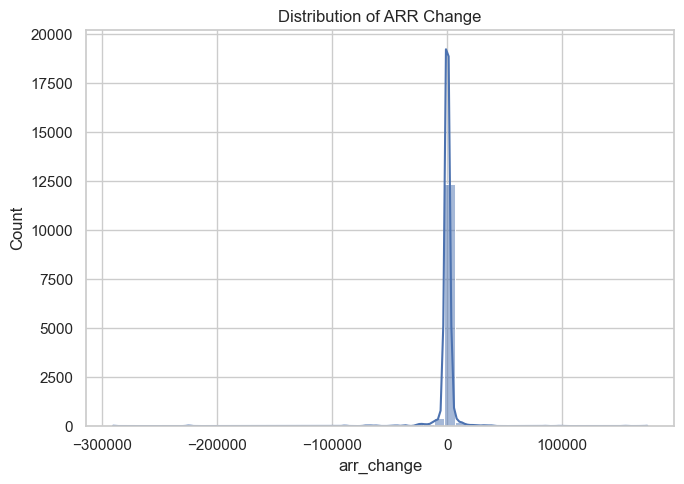

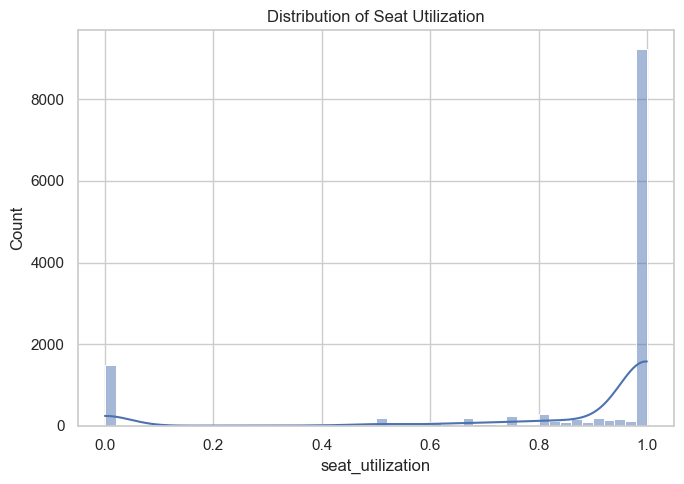

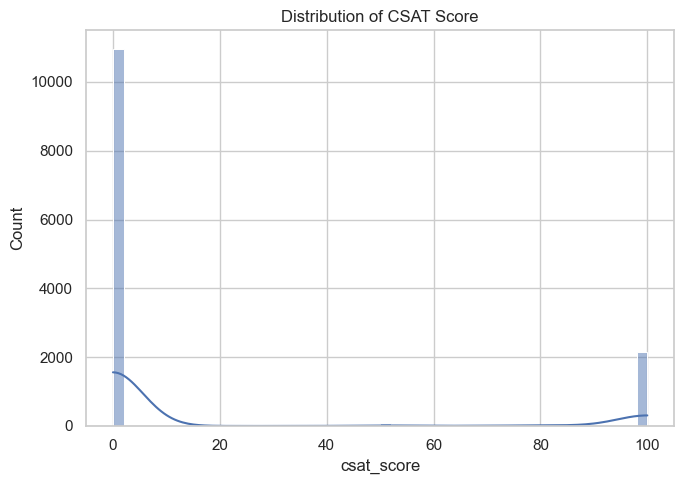

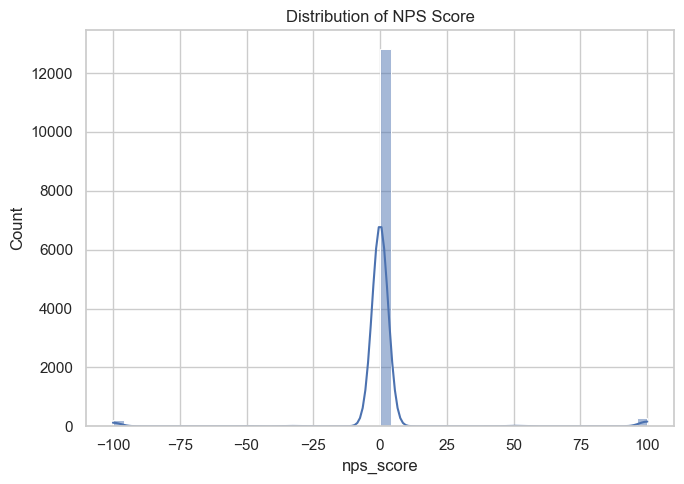

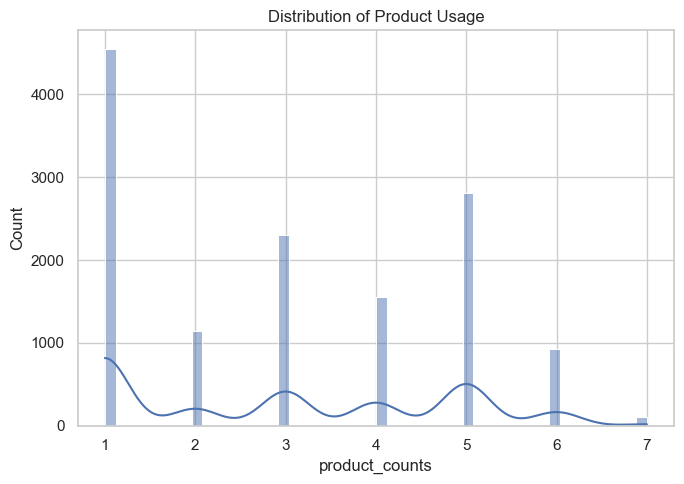

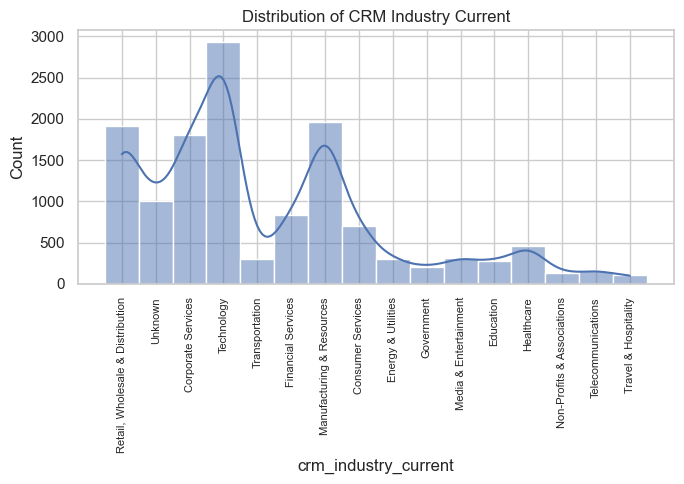

In [38]:
sns.set_style("whitegrid")

# Plot 1: Distribution of ARR Change
plt.figure(figsize=(7, 5))
sns.histplot(df["arr_change"], bins=50, kde=True)
plt.title("Distribution of ARR Change")
plt.tight_layout()
plt.show()

# Plot 2: Distribution of Seat Utilization
plt.figure(figsize=(7, 5))
sns.histplot(df["seat_utilization"], bins=50, kde=True)
plt.title("Distribution of Seat Utilization")
plt.tight_layout()
plt.show()

# Plot 3: Distribution of CSAT Score
plt.figure(figsize=(7, 5))
sns.histplot(df["csat_score"], bins=50, kde=True)
plt.title("Distribution of CSAT Score")
plt.tight_layout()
plt.show()

# Plot 4: Distribution of NPS Score
plt.figure(figsize=(7, 5))
sns.histplot(df["nps_score"], bins=50, kde=True)
plt.title("Distribution of NPS Score")
plt.tight_layout()
plt.show()

# Plot 5: Distribution of Product Usage
plt.figure(figsize=(7, 5))
sns.histplot(df["product_counts"], bins=50, kde=True)
plt.title("Distribution of Product Usage")
plt.tight_layout()
plt.show()

# Plot 6: Distribution of crm_industry_current
plt.figure(figsize=(7, 5))
sns.histplot(df["crm_industry_current"], bins=50, kde=True)
plt.title("Distribution of CRM Industry Current")
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels vertically and reduce font size
plt.tight_layout()
plt.show()


In [39]:
df.columns

Index(['id', 'score_date', 'segment_smb', 'segment_non_smb',
       'segment_commercial', 'segment_enterprise', 'segment_midmarket',
       'region_emea', 'region_apac', 'region_latam', 'region_amer',
       'customer_age_quarters', 'sales_assisted', 'legacy_flag',
       'product_counts', 'billing_dunning_not_ok', 'crm_industry_current',
       'crm_employee_range', 'crm_success_owner_change', 'csat_score',
       'csat_response_rate', 'nps_score', 'nps_score_all_time',
       'avg_nps_rating', 'avg_nps_rating_all_time', 'outreach_call_90dayflag',
       'num_low_sev_outages', 'num_high_sev_outages',
       'months_since_high_sev_outage', 'num_tickets_deflected',
       'max_tickets_per_agent', 'current_arr', 'future_arr', 'arr_change',
       'fx_impact', 'seat_change_arr', 'product_change_arr',
       'discount_arr_usd', 'team_plus', 'pro_plus', 'ent_plus',
       'discount_arr_usd_percentage', 'product_counts_percentage',
       'total_pool_max_agents', 'max_seats', 'agent_utilizat

In [40]:
df.describe()

,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,region_amer,customer_age_quarters,...,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
count,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,...,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000,13389.000000
mean,0.228023,0.771977,0.087759,0.041303,0.031593,0.397192,0.161849,0.058780,0.382179,15.181194,...,8.877810,0.148547,7.800956,8.828441,0.048099,0.443648,0.839780,0.838284,0.043693,0.048846
std,0.419573,0.419573,0.282954,0.198997,0.174921,0.489335,0.368326,0.235221,0.485938,3.907299,...,26.401349,0.268514,23.944982,26.158741,0.213984,0.496833,0.322337,0.324812,0.204418,0.215554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.875000,0.875000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,...,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,...,8.000000,0.200000,7.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,...,500.000000,1.000000,487.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df["arr_change"].describe()

count     13389.000000
mean       -428.301898
std       12699.269375
min     -290511.840000
25%           0.000000
50%           0.000000
75%           0.000000
max      174000.000000
Name: arr_change, dtype: float64

In [42]:
df["seat_utilization"].describe()

count    13389.000000
mean         0.839780
std          0.322337
min          0.000000
25%          0.875000
50%          1.000000
75%          1.000000
max          1.000000
Name: seat_utilization, dtype: float64

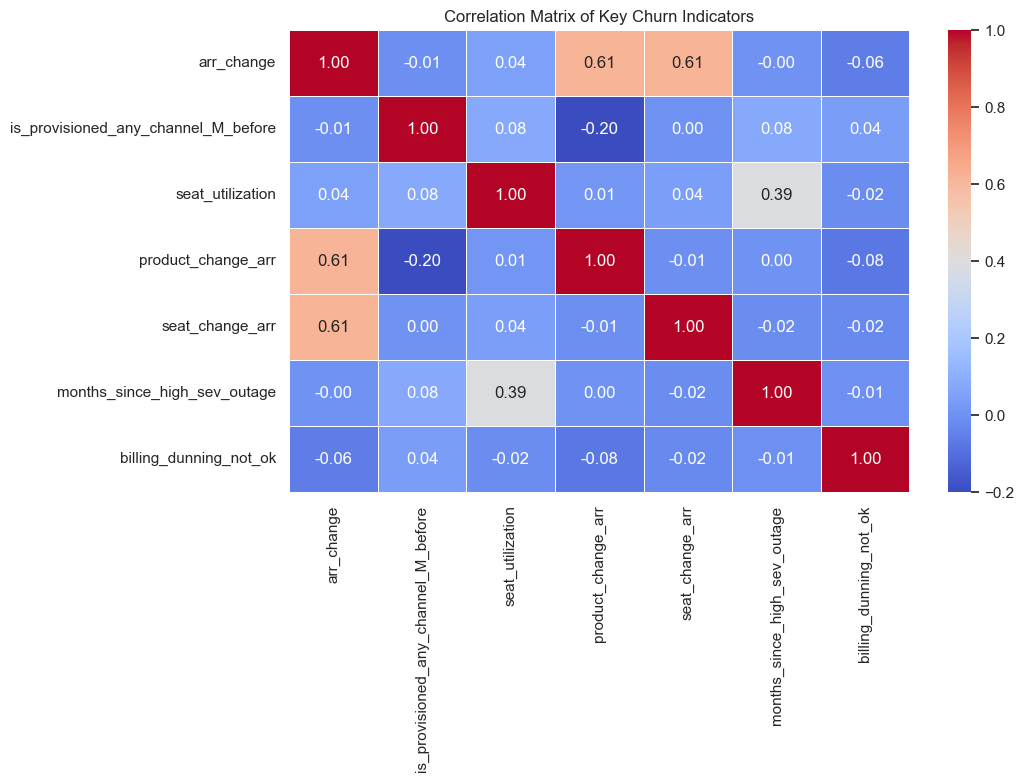

In [43]:

correlation_matrix = df[["arr_change", "is_provisioned_any_channel_M_before","seat_utilization",
                   "product_change_arr","seat_change_arr","months_since_high_sev_outage","billing_dunning_not_ok"
                       ]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Churn Indicators")
plt.show()

In [44]:
# Unstack the correlation matrix and sort by absolute correlation values
correlation_pairs = correlation_matrix.unstack()
sorted_correlation = correlation_pairs.abs().sort_values(ascending=False)

# Filter out self-correlations
top_correlations = sorted_correlation[sorted_correlation < 1].head(10)

# Display the top correlated factors
print("Top Correlated Factors:")
print(top_correlations)


Top Correlated Factors:
product_change_arr                   arr_change                             0.612241
arr_change                           product_change_arr                     0.612241
                                     seat_change_arr                        0.611975
seat_change_arr                      arr_change                             0.611975
months_since_high_sev_outage         seat_utilization                       0.386362
seat_utilization                     months_since_high_sev_outage           0.386362
is_provisioned_any_channel_M_before  product_change_arr                     0.200053
product_change_arr                   is_provisioned_any_channel_M_before    0.200053
is_provisioned_any_channel_M_before  seat_utilization                       0.079260
seat_utilization                     is_provisioned_any_channel_M_before    0.079260
dtype: float64


In [45]:
df['churn_risk'] = (df['arr_change'] < -428).astype(int) | (df["seat_utilization"]==0).astype(int)
df['churn_risk'].value_counts()

churn_risk
0    10618
1     2771
Name: count, dtype: int64

In [46]:
df['outage_severity_ratio'] = df['num_high_sev_outages'] / (df['num_low_sev_outages'] + 1)
df['utilization_change'] = df['seat_utilization'] - df['seat_utilization_M_before']
df['tenure_group'] = pd.cut(df['customer_age_quarters'], 
                           bins=[0, 4, 8, 12, 16, 20, np.inf],
                           labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5y+'])

In [47]:
df.head(5)

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease,churn_risk,outage_severity_ratio,utilization_change,tenure_group
0,JMAN_2429072,2023-02-10,1,0,0,0,0,1,0,0,...,0,0,1.0,1.0,0,0,0,0.0000,0.0,3-4y
1,JMAN_9043466,2023-01-13,0,1,1,0,0,1,0,0,...,0,1,1.0,1.0,0,0,0,0.0000,0.0,3-4y
2,JMAN_2452556,2023-02-24,0,1,0,0,0,1,0,0,...,0,0,1.0,1.0,0,0,0,0.0625,0.0,4-5y
3,JMAN_2455113,2023-03-03,0,1,0,0,0,1,0,0,...,0,1,1.0,1.0,0,0,0,0.0000,0.0,4-5y
4,JMAN_18127937,2023-02-10,0,1,0,0,0,1,0,0,...,0,0,0.0,0.0,0,0,1,0.0000,0.0,4-5y


In [48]:
features = [
    'customer_age_quarters', 'sales_assisted', 'legacy_flag', 'product_counts',
    'billing_dunning_not_ok', 'num_low_sev_outages', 'num_high_sev_outages',
    'months_since_high_sev_outage', 'num_tickets_deflected', 'max_tickets_per_agent',
    'current_arr', 'discount_arr_usd', 'discount_arr_usd_percentage',
    'product_counts_percentage', 'max_seats', 'agent_utilization',
    'seat_utilization', 'outage_severity_ratio', 'utilization_change', 'arr_change'
]

In [49]:
target = 'churn_risk'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
df['churn_risk'].value_counts()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_pred_rf))

# Logistic Regression model
logistic_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logistic_model.fit(X_train_scaled, y_train_resampled)
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_logistic))

# SVM model
svm_model = SVC(random_state=42, class_weight='balanced', probability=True)
svm_model.fit(X_train_scaled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test_scaled)
print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("SVM ROC AUC:", roc_auc_score(y_test, y_pred_svm))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train_resampled)
y_pred_gb = gb_model.predict(X_test_scaled)

print("\nGradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting ROC AUC:", roc_auc_score(y_test, y_pred_gb))


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3186
           1       1.00      1.00      1.00       831

    accuracy                           1.00      4017
   macro avg       1.00      1.00      1.00      4017
weighted avg       1.00      1.00      1.00      4017

Random Forest ROC AUC: 1.0

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3186
           1       0.91      0.93      0.92       831

    accuracy                           0.97      4017
   macro avg       0.95      0.95      0.95      4017
weighted avg       0.97      0.97      0.97      4017

Logistic Regression ROC AUC: 0.9524164836683957

SVM Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3186
           1       0.95      0.85      0.90       831

    accuracy                           0

In [50]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define the parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', None],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['lbfgs', 'liblinear', 'saga'],
#     'class_weight': ['balanced', None],
#     'max_iter': [100, 500, 1000]
# }

# # Initialize the Logistic Regression model
# logistic_model = LogisticRegression(random_state=42)

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train_resampled)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# print("Best Parameters for Logistic Regression:", best_params)

# # Evaluate the best model on the test set
# y_pred_best_logistic = best_model.predict(X_test_scaled)
# print("\nTuned Logistic Regression Results:")
# print(classification_report(y_test, y_pred_best_logistic))
# print("Tuned Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_best_logistic))

In [51]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from scipy.stats import uniform

# # Define the parameter distribution
# param_distributions = {
#     'penalty': ['l1', 'l2', 'elasticnet', None],
#     'C': uniform(0.01, 100),  # Randomly sample C values between 0.01 and 100
#     'solver': ['lbfgs', 'liblinear', 'saga'],
#     'class_weight': ['balanced', None],
#     'max_iter': [100, 500, 1000]
# }

# # Initialize the Logistic Regression model
# logistic_model = LogisticRegression(random_state=42)

# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=logistic_model,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of random combinations to try
#     scoring='roc_auc',
#     cv=5,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )
# random_search.fit(X_train_scaled, y_train_resampled)

# # Get the best parameters and model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

# print("Best Parameters for Logistic Regression (RandomizedSearchCV):", best_params)

# # Evaluate the best model on the test set
# y_pred_best_logistic = best_model.predict(X_test_scaled)
# print("\nTuned Logistic Regression Results (RandomizedSearchCV):")
# print(classification_report(y_test, y_pred_best_logistic))
# print("Tuned Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_best_logistic))

In [57]:
import shap

# Standardize the data WITHOUT resampling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression (No SMOTE applied)
logistic_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_logistic))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3186
           1       0.92      0.93      0.92       831

    accuracy                           0.97      4017
   macro avg       0.95      0.95      0.95      4017
weighted avg       0.97      0.97      0.97      4017

Logistic Regression ROC AUC: 0.9541167245689058


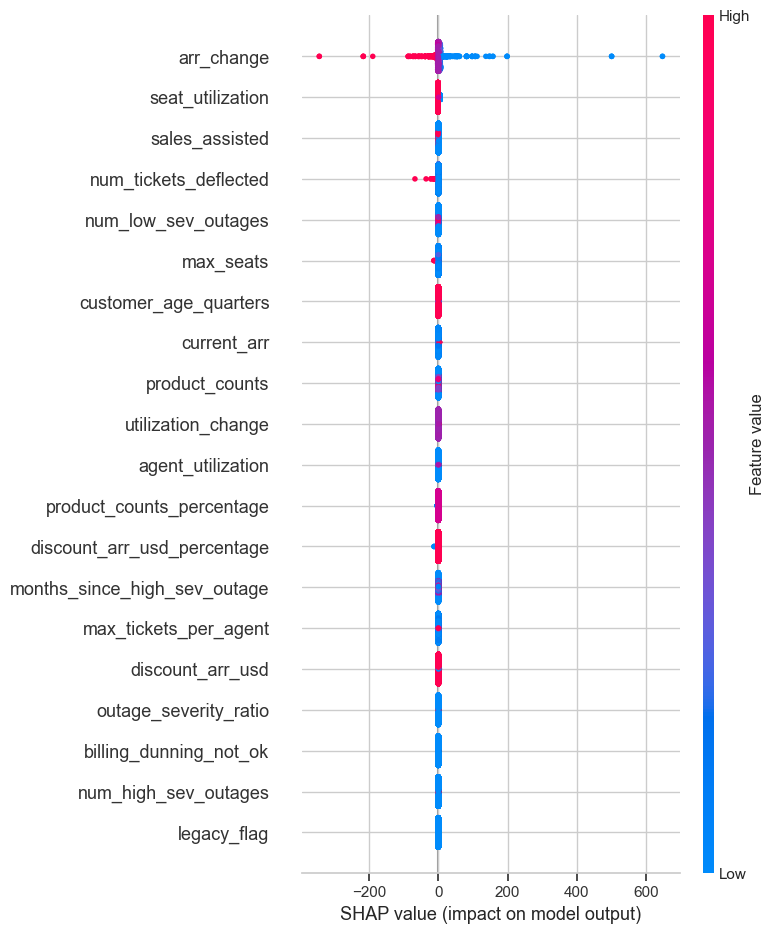

In [58]:
# Initialize SHAP explainer
explainer = shap.Explainer(logistic_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Summary plot (Feature importance visualization)
shap.summary_plot(shap_values, X_test, feature_names=features)

# Force plot for a single prediction (example)
# shap.initjs()
# Convert SHAP values to an Explanation object
shap_values_exp = shap.Explanation(shap_values.values, base_values=shap_values.base_values, data=X_test_scaled)

# Force plot for a single prediction (example)
shap.initjs()
shap.force_plot(shap_values_exp.base_values[0], shap_values_exp.values[0], X_test.iloc[0], feature_names=features)


In [63]:
# import lime
# import lime.lime_tabular


# explainer = lime.lime_tabular.LimeTabularExplainer(
#     X_train_scaled, 
#     feature_names=features, 
#     class_names=['Not Churn', 'Churn'], 
#     mode='classification'
# )

# # Pick an instance from test set for explanation
# instance_index = 0  # Change this to analyze different test samples
# instance = X_test_scaled[instance_index].reshape(1, -1)

# # Generate explanation
# exp = explainer.explain_instance(instance.flatten(), logistic_model.predict_proba)

# # Display explanation
# exp.show_in_notebook()


import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Set the matplotlib style to white background
plt.style.use('default')

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled, 
    feature_names=features, 
    class_names=['Not Churn', 'Churn'], 
    mode='classification'
)

# Pick an instance from the test set for explanation
instance_index = 0  # Change this to analyze different test samples
instance = X_test_scaled[instance_index].reshape(1, -1)

# Generate explanation
exp = explainer.explain_instance(instance.flatten(), logistic_model.predict_proba)

# Display explanation
exp.show_in_notebook()